In [ ]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

In [ ]:
data_google_id = '1ZvjktVxcD-EWIqm32Kg4IbWWHfYzSc9G'

gdd.download_file_from_google_drive(file_id=data_google_id,
                                    dest_path = './data.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True,
                                    overwrite = True)

# Armazenandos os dados em um DataFrame
dados = pd.read_csv("data.csv", sep = ',')

160.0 KiB Done.


In [ ]:
dados.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
dados['Extracurricular Activities'].replace({'No':0,'Yes':1}, inplace = True)

<ipython-input-5-72e86b62d433>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['Extracurricular Activities'].replace({'No':0,'Yes':1}, inplace = True)
<ipython-input-5-72e86b62d433>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['Extracurricular Activities'].replace({'No':0,'Yes':1}, 

In [ ]:
dados.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
dados.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Extracurricular Activities'}>,
        <Axes: title={'center': 'Sleep Hours'}>],
       [<Axes: title={'center': 'Sample Question Papers Practiced'}>,
        <Axes: title={'center': 'Performance Index'}>]], dtype=object)

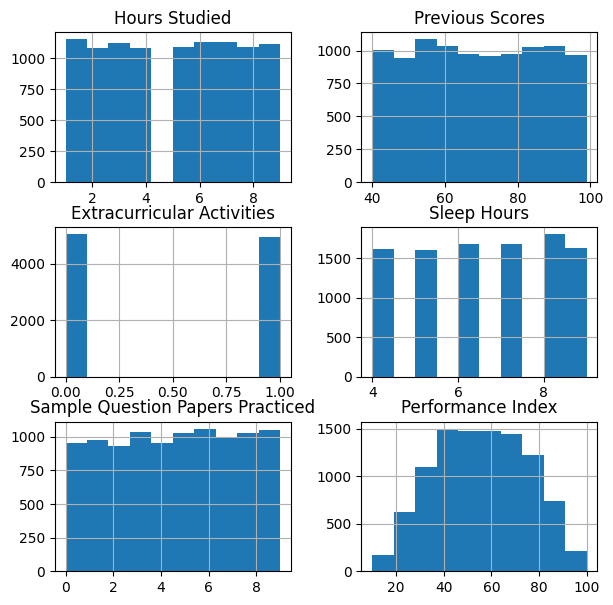

In [ ]:
dados.hist(figsize=(7,7))

# SEPARAÇÃO DO CONJUNTO DE DADOS:

In [ ]:
# seu código aqui
# Divisão dos dados em Entrada X e Saida Y
X = dados.drop(columns=['Performance Index'])
y = dados['Performance Index']

#Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Ajustando as escalas dos dados
#Instanciando um objeto em normalização
scale = StandardScaler()
#Obtendo os valores minimos e máximos em cada coluna
scale.fit(X_train)
#Criando novos dataFrames normalizados
X_train_norm = scale.transform(X_train)
X_test_norm = scale.transform(X_test)

# METODO PADRÃO DE TREINAMENTO E SEPARAÇÃO DE METRICAS

### Regressão Linear

In [ ]:
#instanciando um objeto em regressão linear
modelo_rl = LinearRegression()
#Treinando o modelo de regressão linear
modelo_rl.fit(X_train_norm, y_train)
#Obtendo as previsões de seguro de vida
y_pred_RL = modelo_rl.predict(X_test_norm)

### Árvores de Decisão para regressão:

In [ ]:
reg_AD = DecisionTreeRegressor(max_depth=3)
reg_AD.fit(X_train_norm, y_train)
y_pred_AD = reg_AD.predict(X_test_norm)

### Random Forest para regressão:

In [ ]:
reg_FA = RandomForestRegressor()
reg_FA.fit(X_train_norm, y_train)
y_pred_FA = reg_FA.predict(X_test_norm)

### Gradient Boosting Regressor:

In [ ]:
reg_GB = GradientBoostingRegressor(min_samples_leaf = 5, n_estimators = 50)
reg_GB.fit(X_train_norm, y_train)
y_pred_GB = reg_GB.predict(X_test_norm)

### PREVISÕES

In [ ]:
previsoes_modelo = {"Regressão linear" : y_pred_RL, "Árvore de Decisão" : y_pred_AD, "Random Forest" : y_pred_FA, "Gradient Boosting Regressor" : y_pred_GB}

### RESULTADOS DAS MATRICAS OBTIDAS

In [ ]:
for nome_modelo, y_pred in previsoes_modelo.items():
  print('='*30)
  print(nome_modelo)
  print(f"MSE = {mean_squared_error(y_true = y_test, y_pred = y_pred):.2f}")
  print(f"MAE = {mean_absolute_error(y_true = y_test, y_pred = y_pred):.2f}")
  print(f"R2 = {r2_score(y_true = y_test, y_pred = y_pred):.2f}")

Regressão linear
MSE = 4.07
MAE = 1.61
R2 = 0.99
Árvore de Decisão
MSE = 38.81
MAE = 5.08
R2 = 0.90
Random Forest
MSE = 5.29
MAE = 1.84
R2 = 0.99
Gradient Boosting Regressor
MSE = 5.11
MAE = 1.79
R2 = 0.99


### ======================================================================================

# METODO UTILIZANDO AUTOMAÇÃO DE TREINAMENTOE SEPARAÇÃO DE METRICAS

CRIANDO UM DICIONARIO PARA ARMAZENAR AS METRICAS E SEU NOME

In [ ]:
previsoes_modelo2 = {"Regressão Linear" :LinearRegression(),
                    "Árvore de Decisão" : DecisionTreeRegressor(max_depth=3),
                    "Random Forest" : RandomForestRegressor(),
                    "Gradient Boosting Regressor" : GradientBoostingRegressor(min_samples_leaf=5,n_estimators=50)}

In [ ]:
dicionario_previsoes = {}

for nome_modelo, modelo in previsoes_modelo2.items():
  pao= modelo
  pao.fit(X_train, y_train)
  dicionario_previsoes[nome_modelo] = pao.predict(X_test)


In [ ]:
for nome_modelo, y_pred in dicionario_previsoes.items():
  print('='*30)
  print(nome_modelo)
  print(f"MSE = {mean_squared_error(y_true=y_test,y_pred=y_pred):.2f}")
  print(f"MAE = {mean_absolute_error(y_true=y_test,y_pred=y_pred):.2f}")
  print(f"R2 = {r2_score(y_true=y_test,y_pred=y_pred):.2f}")

Regressão Linear
MSE = 4.07
MAE = 1.61
R2 = 0.99
Árvore de Decisão
MSE = 38.81
MAE = 5.08
R2 = 0.90
Random Forest
MSE = 5.27
MAE = 1.84
R2 = 0.99
Gradient Boosting Regressor
MSE = 5.11
MAE = 1.79
R2 = 0.99
